# Parameterized Learning

The k-NN classifier – a machine learning model so simple
that it doesn’t do any actual “learning” at all. We simply have to store the training data inside
the model, and then predictions are made at test time by comparing the testing data points to
our training data.

How to learn something?

## Parameterization

parameterization is the process of defining the necessary parameters of a
given model

## Loss function

A loss function quantifies how well our predicted class labels agree with our ground-truth labels.

![loss](../asset/loss.png)

## Weights and Biases

The weight matrix, typically denoted as **W** and the bias vector **b** are called the **weights** or
parameters of our classifier that we’ll actually be optimizing. Based on the output of our scoring
function and loss function, we’ll be tweaking and fiddling with the values of the weights and biases
to increase classification accuracy.

### Bias

In effect, **a bias value allows you to shift the activation function to the left or right**, which may be critical for successful learning.

In other words this sigmoind function

![loss](../asset/without_bias.png)

can look like this

![loss](../asset/with_bias.png)

**shifts the curve to the right, which allows us to have a network that outputs 0 when x is 2.**

# Linear Classification

Let’s assume that our training dataset is denoted as **xi** where each
image has an associated class label yi . We’ll assume that

**i = 1, ..., N** and

**yi = 1, ..., K**

implying that we have **N** data points of dimensionality **D**, separated into **K** unique categories.


Given these variables, we must now define a scoring function f that maps the images to the
class label scores. One method to accomplish this scoring is via a simple linear mapping:


f(xi ,W, b) = W * xi + b **texte en gras**

Where W * xi is W dot product with xi

Here a simple ilustration of the dot product

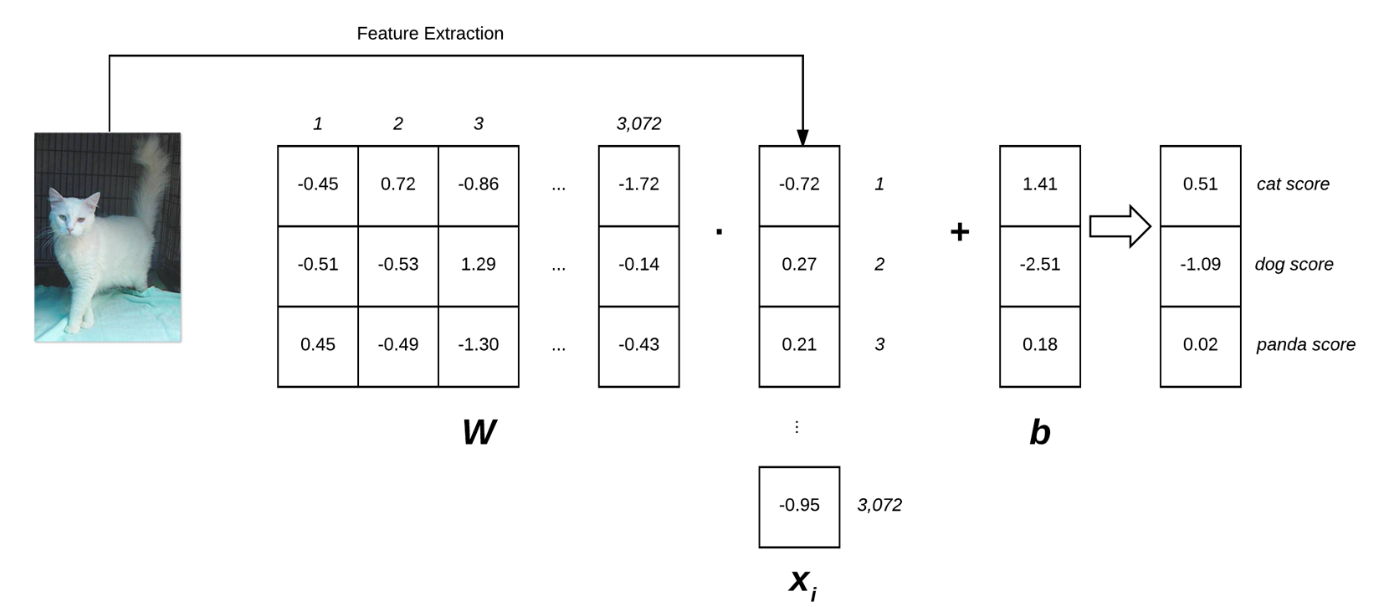

## Small demo

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


class LinearLayer:
    def __init__(self, input_dim, output_dim):
        # Initialiser la matrice de poids et le vecteur de biais avec des valeurs aléatoires
        self.weights = np.random.randn(input_dim, output_dim)
        self.bias = np.random.randn(output_dim)

    def forward(self, inputs):
        # Calculer les sorties de la couche
        return np.dot(inputs, self.weights) + self.bias

In [ ]:
# initialize the class labels and set the seed of the pseudorandom
# number generator so we can reproduce our results
labels = ["dog", "cat", "panda"]
np.random.seed(1)

image_size = 32
# Grayscale format
color_chan = 1

layer = LinearLayer(image_size * image_size * color_chan, len(labels))

In [ ]:
layer.weights

In [ ]:
# load our example image, resize it, and then flatten it into our
# "feature vector" representation
orig = cv2.imread("../asset/old_dog.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(orig, cmap='gray')
plt.show()
x = cv2.resize(orig, (32, 32)).flatten()
print(x.shape)

In [ ]:
# compute the output scores by taking the dot product between the
# weight matrix and image pixels, followed by adding in the bias
scores = layer.forward(x)
# loop over the scores + labels and display them
for (label, score) in zip(labels, scores):
    print("[INFO] {}: {:.2f}".format(label, score))

# Gradient Descent in 5min

![gradiant](../asset/gradiant.png)

* In left we got Bob the robot
* Bob job to navigate our loss landscape and
descend to the bottom of the basin.
* But Bob only has one sensor his loss function L

But Bob only has one sensor, this sensor
allows him to take his parameters **W** and **b** and then compute a loss function **L**

But he has absolutely no idea in which **direction** he should take a step to move himself closer to the bottom of the basin.

**What is the solution ?**

**The answer is to apply gradient descent.** All Chad needs to do is follow
the slope of the **gradient** **W** . We can compute the gradient **W** across all dimension


So in maths, the **slope** is the **derivative**

![gradiant](../asset/slope.png)

## Pseudocode for Gradient Descent


In [ ]:
while True:
    Wgradient = evaluate_gradient(loss, data, W)
    W += -alpha * Wgradient

The **evaluate_gradient** function returns a vector that is **K-dimensional**, where **K** is the
number of dimensions in our image/feature vector. The **Wgradient** variable is the actual gradient,
where we have a gradient entry for each dimension.

-------------

We then apply gradient descent on **Line 3**. We multiply our **Wgradient** by **alpha (α)**, which
is our **learning rate**. The learning rate controls the size of our step.

* Big step will go fast but we can miss the global minimum
* Low step will be slow and yake longer to train

The goal is to found the good learning rate !



## Demo

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

Creat sigmoid activation function

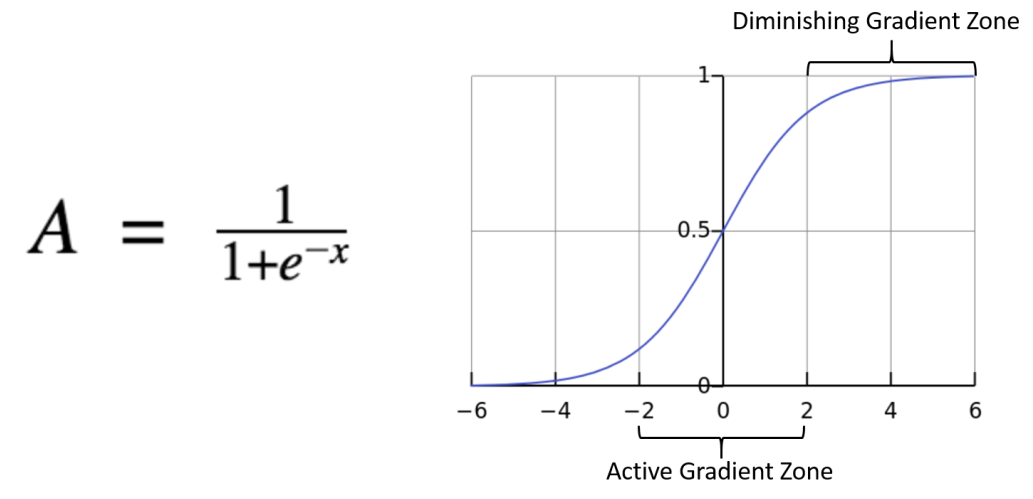

In [ ]:
class LinearLayer:
    def __init__(self, input_dim, output_dim):
        # Initialize weight matrix and bias vector with random values
        self.weights = np.random.randn(input_dim, output_dim) * 0.01  # we scale the weights down
        self.bias = np.zeros(output_dim)
        self.input_dim = input_dim
        self.output_dim = output_dim

    def sigmoid(self, x):
        # implementation of the sigmoid function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # calculation of the sigmoid derivative
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def forward(self, inputs):
        return self.sigmoid(np.dot(inputs, self.weights) + self.bias)

    def backward(self, batch_x, batch_y, preds, learning_rate):
        # now that we have our predictions, we need to determine the
        # `error`, which is the difference between our predictions
        # and the true values
        error = preds - batch_y
        loss = np.sum(error ** 2)

        # the gradient descent update is the dot product between our
        # (1) current batch and (2) the error of the sigmoid
        # derivative of our predictions
        d = self.sigmoid_derivative(preds) * error
        gradient = batch_x.T.dot(d)
        bias_gradiant = np.sum(d, axis=0)

        # update weights and biases
        self.weights = self.weights - learning_rate * gradient
        self.bias = self.bias - learning_rate * bias_gradiant

        # return loss
        return loss

### Build small dataset

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
# Generate a 2D dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=22)
# Because our current implementation expects y to be 2D, we need to add an extra dimension to y
y = y[:, np.newaxis]

In [ ]:
print(X.shape)
print(y.shape)
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])

# Display the plot
plt.show()

In [ ]:
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(X_train.shape)
print(y_train.shape)

### Creat train loop

In [ ]:
# Creat linear layer with the number of features 2, and 0 or 1 output (1 label)
layer = LinearLayer(X.shape[1], 1)

learning_rate = 0.01
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    preds = layer.forward(X_train)
    # Backward pass
    loss = layer.backward(X_train, y_train, preds, learning_rate)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

### Evaluate the model

In [ ]:
# evaluate our model
preds = layer.forward(X_test)
print(classification_report(y_test, np.around(preds)))

[A very good article on gradient descent](https://www.charlesbordet.com/fr/gradient-descent/#comment-ca-marche-)

# Image Classifier with pytorch


In [17]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.

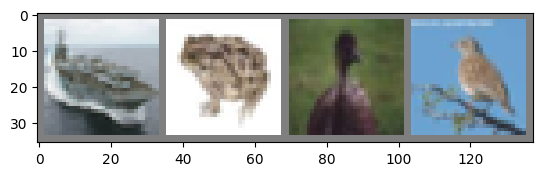

ship  frog  bird  bird 


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [20]:
images.shape

torch.Size([4, 3, 32, 32])

## Define a Convolutional Neural Network

![cnn](../asset/cnn.png)

### Quick tour CNN

A CNN is a simple convolution matrix with learning weights

![cnn](../asset/convolution-calculate.png)

`(40*0)+(42*1)+(46*0) + (46*0)+(50*0)+(55*0) + (52*0)+(56*0)+(58*0) = 42`





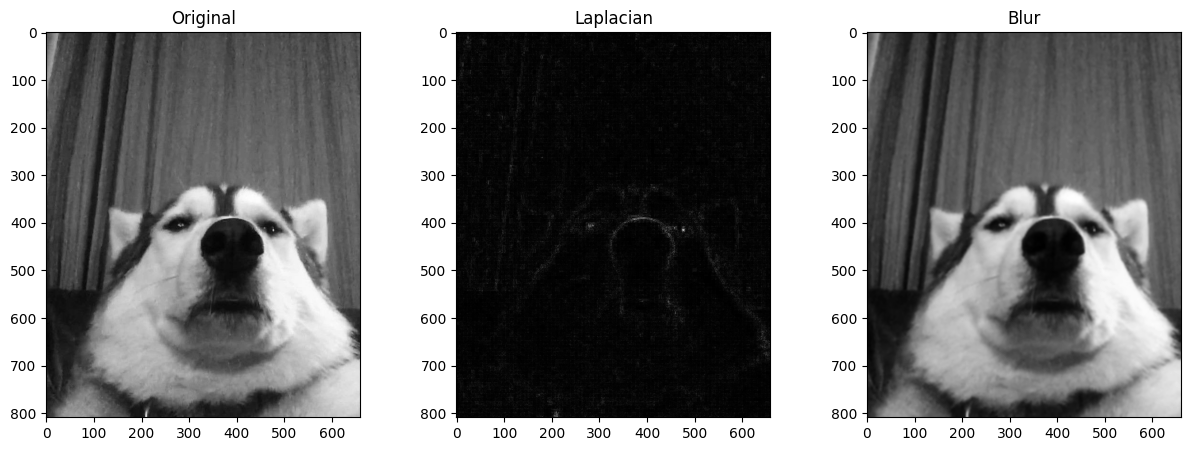

In [16]:
import cv2

# Load the image
image = cv2.imread('../asset/old_dog.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_16S)

# Apply blur filter
blur = cv2.blur(image, (5, 5))  # blur with 5x5 kernel


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Show each image in a subplot
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(cv2.convertScaleAbs(laplacian), cmap='gray')
axes[1].set_title('Laplacian')
axes[2].imshow(blur, cmap='gray')
axes[2].set_title('Blur')
plt.show()

### Pooling

- The Pooling layer in a Convolutional Neural Network (CNN) is used to reduce the spatial size of the Convolved Feature.
- The reduction in spatial size helps decrease the computational power required, thereby aiding in dimensionality reduction.
- Pooling is effective for extracting dominant features that are invariant to rotations and positions.
- Overall, pooling aids in the efficient training of the model by maintaining significant information while reducing details.

![SegmentLocal](../asset/pool.gif "segment")

### ShallowNet

Lets creat a very simple CNN

The network architecture can be summarized as: INPUT => CONV => RELU => FC

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class ShallowNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()